In [1]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#pandas.options.display.max_columns = None
#pandas.options.display.max_rows = None

netflix = pandas.read_csv("netflixData.csv")
netflix.head(15)

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"
5,c293788a-41f7-49a3-a7fc-005ea33bce2b,#FriendButMarried,"Pining for his high school crush for years, a ...",Rako Prijanto,"Dramas, International Movies, Romantic Movies","Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,2018.0,TV-G,102 min,7.0/10,Movie,"May 21, 2020"
6,0555e67e-f624-4a05-93e4-55c117d0056d,#FriendButMarried 2,As Ayu and Ditto finally transition from best ...,Rako Prijanto,"Dramas, International Movies, Romantic Movies","Adipati Dolken, Mawar de Jongh, Sari Nila, Von...",Indonesia,2020.0,TV-G,104 min,7.0/10,Movie,"June 28, 2020"
7,c844460f-6178-4f87-929e-80816c74ca35,#realityhigh,When nerdy high schooler Dani finally attracts...,Fernando Lebrija,Comedies,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017.0,TV-14,99 min,5.1/10,Movie,"September 8, 2017"
8,8b34e0e9-7258-4e49-b799-2e7eddbd7e34,#Rucker50,This documentary celebrates the 50th anniversa...,Robert McCullough Jr.,"Documentaries, Sports Movies",NaN,United States,2016.0,TV-PG,56 min,5.1/10,Movie,"December 1, 2016"
9,6da2fc83-1546-4e9d-bf2e-9b472a059c18,#Selfie,"Two days before their final exams, three teen ...",Cristina Jacob,"Comedies, Dramas, International Movies","Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,2014.0,TV-MA,125 min,5.8/10,Movie,"June 21, 2021"


In [2]:
# Does Netflix have more shows or movies?
shows = netflix[netflix["Content Type"] == "TV Show"]
show_count = len(shows)

movies = netflix[netflix["Content Type"] == "Movie"]
movie_count = len(movies)

print("Netflix show count:", show_count, "\nNetflix's movie count:", movie_count)

Netflix show count: 2100 
Netflix's movie count: 3867


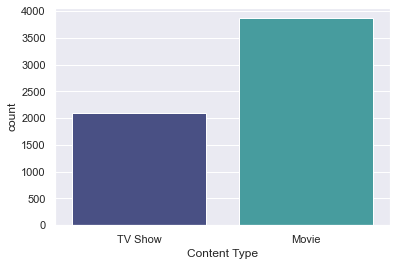

In [3]:
sns.set(style="darkgrid")
graph = sns.countplot(x = "Content Type", data = netflix, palette = "mako")

# Here we can see that Netflix has more movies than TV shows.


In [4]:
# When would be the best time for a producer to release content?
for index, row in netflix.iterrows():
    date = netflix.iloc[index]['Date Added']
    if (type(date) == str and len(date.split(" ")) != 1):
        netflix.loc[index, 'Date Added'] = date[:date.index(' ')]   

In [5]:
sorted_dates = netflix['Date Added'].value_counts()
month = sorted_dates.index[0]
occurences = sorted_dates[sorted_dates.index[0]]
sorted_dates

June         468
April        467
July         433
October      433
December     396
May          392
November     378
September    372
March        353
August       342
January      302
February     296
Name: Date Added, dtype: int64

C:\Users\James\AppData\Local\Temp/ipykernel_19688/2712472523.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  linegraph.set_xticklabels(Month, rotation=40, ha='right')


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

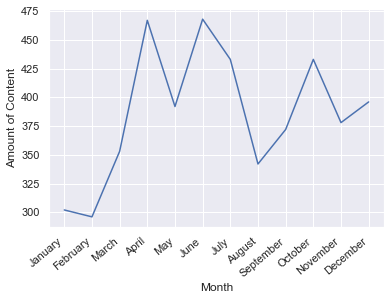

In [6]:
Month = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
Amount = [302, 296, 353, 467, 392, 468, 433, 342, 372, 433, 378, 396]
sns.set(style="darkgrid")
line_plot = pandas.DataFrame({"Month": Month, "Amount of Content":Amount})
linegraph = sns.lineplot(x = "Month", y = "Amount of Content", data = line_plot)
linegraph.set_xticklabels(Month, rotation=40, ha='right')

# February would be the best month for a producer to release content

In [7]:
#Test
#example_date = 'July 6, 2018'
#example_date[:example_date.index(' ')]

In [8]:
# Which audience does Netflix have the most content for?
ratings = netflix["Rating"]

Kid_rating = ["TV-Y", "TV-Y7", "G", "TV-G", "PG", "TV-PG"]
Teen_rating = ["PG-13", "TV-14"]
Adult_rating = ["R", "TV-MA", "NC-17"]

kid_content = 0
teen_content = 0
adult_content = 0

for rate in ratings:
    if rate in Kid_rating:
        kid_content += 1
    elif rate in Teen_rating:
        teen_content += 1
    elif rate in Adult_rating:
        adult_content += 1

print("Amount of content for kids:", kid_content, "\nAmount of content for teens:", teen_content,
     "\nAmount of content for adults:", adult_content)


Amount of content for kids: 1259 
Amount of content for teens: 1777 
Amount of content for adults: 2927


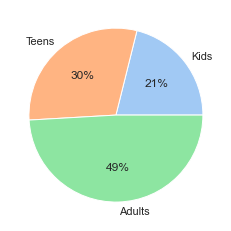

In [9]:
Maturity = ["Kids", "Teens", "Adults"]
Amount2 = [1259, 1777, 2927]

colors = sns.color_palette('pastel')[0:5]
plt.pie(x = Amount2, labels = Maturity, colors = colors, autopct='%.0f%%')
plt.show()

# Netflix has the most amount of content for Adults

In [10]:
# What is the general duration of a movie on Netflix?

movies = netflix[netflix["Content Type"] == "Movie"]
duration = movies["Duration"]

modified_duration = duration.replace("min", "", regex = True)

modified_duration = modified_duration.astype(float)
modified_duration.mean()

99.19162141194725

# An average movie on Netflix is about 99 minutes

In [11]:
# What is the genre distribution for the content on Netflix?
netflix["Genres"].unique()
netflix["Genres"]
netflix.head(5).explode("Genres")

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,September
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,July
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,February


In [12]:
netflix["Genres"] = netflix["Genres"].str.split(",")
netflix["Genres"].explode().value_counts()

 International Movies            1837
Dramas                           1016
Comedies                          819
International TV Shows            615
 TV Dramas                        583
 Dramas                           554
Action & Adventure                506
 International TV Shows           484
Documentaries                     449
 Independent Movies               421
 Romantic Movies                  418
 TV Comedies                      370
Children & Family Movies          363
Crime TV Shows                    329
Stand-Up Comedy                   320
 Thrillers                        313
Kids' TV                          297
 Comedies                         289
 Romantic TV Shows                270
 Music & Musicals                 247
Docuseries                        170
British TV Shows                  166
Anime Series                      154
Horror Movies                     153
 Spanish-Language TV Shows        130
 Korean TV Shows                  127
 Sci-Fi & Fa

In [13]:
# Are there any correlations between a country's produced content and its ratings?

for index, row in netflix.iterrows():
    rating = netflix.iloc[index]['Imdb Score']
    if (type(rating) == str and len(rating.split("/")) != 1):
        netflix.loc[index, 'Imdb Score'] = rating[:rating.index('/')]
        
netflix['Imdb Score'] = netflix['Imdb Score'].astype(float)

country_list = netflix["Production Country"].str.split(",").explode().str.strip()
normal_index_country_list = list(country_list)
unique_countries = []
country_ratings = []
for c_index, r_index in enumerate(country_list.index):
    country = normal_index_country_list[c_index]
    rating = netflix['Imdb Score'][r_index]
    unique_countries.append(country)
    country_ratings.append(rating)
country_rating_df = pandas.DataFrame({"Ratings":country_ratings, "Countries": unique_countries})
country_rating_df['Ratings']
x=country_rating_df.groupby('Countries').mean()[1:]
x
#country_rating_series.groupby(by="index")

,Ratings
Countries,
Albania,5.800000
Algeria,6.650000
Angola,3.700000
Argentina,6.323437
Australia,6.768539
Austria,6.320000
Bahamas,7.900000
Bangladesh,6.900000
Belarus,7.100000


In [14]:
netflix.groupby('Production Country').mean()

,Release Date,Imdb Score
Production Country,,
Argentina,2018.225000,6.211111
"Argentina, Brazil, France, Poland, Germany, Denmark",2017.000000,6.400000
"Argentina, Chile",2006.000000,6.400000
"Argentina, France",2017.000000,5.800000
"Argentina, Italy",2016.500000,5.900000
"Argentina, Spain",2014.666667,6.816667
"Argentina, United States",2019.000000,5.900000
"Argentina, United States, Mexico",2020.000000,7.100000
"Argentina, Uruguay, Serbia",2018.000000,7.200000


In [15]:
#list(country_list)

In [16]:
#for index, value in enumerate(['apple,', 'orange', 'grapefruit']):
#    print(index, value)

In [17]:
#netflix['Imdb Score'][0]

In [18]:
#for c_index, r_index in enumerate(country_list.index):
#    print(c_index, r_index)

In [21]:
#Recommendation Machine Learning Algorithm
features = ['Title','Cast','Genres','Director']

def combine_features(row):
    #print(type(row[features[0]]) , type(row[features[1]]), type(row[features[2]]), type(row[features[3]]))
    return row[features[0]] +" "+row[features[1]]+" "+str(row[features[2]])+" "+row[features[3]]

for feature in features:
    netflix[feature] = netflix[feature].fillna('')
    
netflix["combined_features"] = netflix.apply(combine_features,axis=1)

cv = CountVectorizer()
count_matrix = cv.fit_transform(netflix["combined_features"])

cosine_sim = cosine_similarity(count_matrix)

def get_title_from_index(index):
    return netflix[netflix.index == index]["Title"].values[0]

def get_index_from_title(Title):
    return netflix[netflix.Title == Title].index.values[0]

movie_user_likes = "Stranger Things"
movie_index = get_index_from_title(movie_user_likes)

similar_movies =  list(enumerate(cosine_sim[movie_index]))

sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]

i=0
print("Top 5 similar movies/shows to "+movie_user_likes+" are:\n")
for element in sorted_similar_movies:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>=5:
        break

Top 5 similar movies/shows to Stranger Things are:

Beyond Stranger Things
The Umbrella Academy
Prank Encounters
Motown Magic
Haunted
